# Model Evaluation

## Regression

In [1]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
import pandas as pd

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split

In [2]:
data=load_diabetes()
df=pd.DataFrame(data.data)
df['target']=data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
X=df.drop('target', axis=1)
y=df.target

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [4]:
rf=RFR().fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [6]:
# MSE
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3424.3469369369363

In [7]:
# RMSE

rmse=mse(y_test, y_pred)**0.5
rmse

58.51791979331576

In [8]:
# RMSLE
from sklearn.metrics import mean_squared_log_error as msle

rmsle=msle(y_test, y_pred)
rmsle

0.17915384581349303

In [9]:
# MAE
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

45.38828828828827

In [10]:
# R2
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.45765786229520544

In [11]:
rf.score(X_test, y_test)

0.45765786229520544

## Classification

In [12]:
from sklearn.datasets import load_wine

In [13]:
data=load_wine()
df=pd.DataFrame(data.data)
df['target']=data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
X=df.drop('target', axis=1)
y=df.target

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [15]:
from sklearn.svm import SVC

svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.4

In [17]:
svc.score(X_test, y_test)

0.4

In [22]:
# Precision
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.4573643410852713

In [23]:
# Recall
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.3888888888888889

In [24]:
# F1-score
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.27602905569007263

In [25]:
# Matriz de confusion

from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[ 2, 10,  0],
       [ 0, 16,  0],
       [ 0, 17,  0]])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

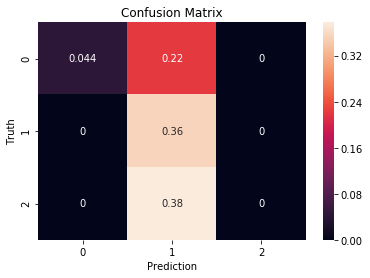

In [27]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

In [29]:
# ROC-AUC

from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
df=pd.DataFrame(data.data)
df['target']=data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
X=df.drop('target', axis=1)
y=df.target

X_train, X_test, y_train, y_test=train_test_split(X,y)

In [43]:
svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[::, -1]

In [32]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

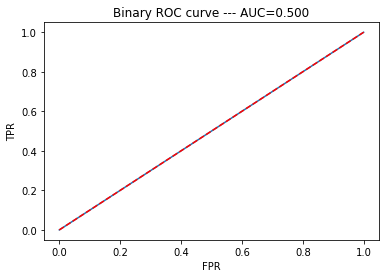

In [35]:
fpr, tpr, umbrales = roc(y_test, y_pred)
a=auc(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC curve --- AUC={:.3f}'.format(a))
plt.show();

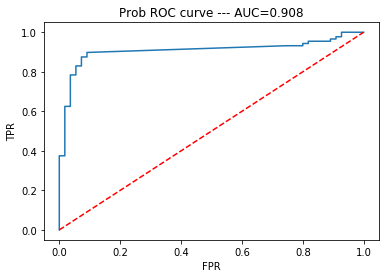

In [45]:
fpr2, tpr2, umbrales2 = roc(y_test, y_prob)
a2=auc(y_test, y_prob)
plt.plot(fpr2, tpr2)
plt.plot(fpr2, fpr2, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Prob ROC curve --- AUC={:.3f}'.format(a2))
plt.show();

# Bayesian Gridsearching

## HyperOpt

In [51]:
import pandas as pd
import xgboost as xgb

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [52]:
df=pd.read_csv('data/diamonds_train.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [53]:
X=df.drop('price', axis=1)
y=df.price

In [54]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

color={'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}

In [55]:
def labeling(s, dic):
    return dic[s]

In [56]:
X.clarity=X.clarity.apply(lambda x: labeling(x, clarity))

X.cut=X.cut.apply(lambda x: labeling(x, cut))

X.color=X.color.apply(lambda x: labeling(x, color))

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.21,3,0,3,62.4,58.0,6.83,6.79,4.25
1,0.32,2,2,3,63.0,57.0,4.35,4.38,2.75
2,0.71,0,3,4,65.5,55.0,5.62,5.53,3.65
3,0.41,1,6,2,63.8,56.0,4.68,4.72,3.00
4,1.02,4,3,2,60.5,59.0,6.55,6.51,3.95


In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [61]:
space={
    'n_estimators':hp.quniform('n_estimators', 10, 1000, 25),
    'learning_rate':hp.uniform('learning_rate', 0.0001, 1.0),
    'max_depth':hp.quniform('x_max_depth', 4, 16, 1),
    'min_child_weight':hp.quniform('x_min_child', 1, 10, 1),
    'subsample':hp.uniform('x_subsample', 0.7, 1),
    'gamma':hp.uniform('x_gamma', 0.1, 0.5),
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1)
}

In [73]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'],
        gamma=space['gamma'],
        reg_lambda=space['reg_lambda'],
        objective='reg:squarederror'
    )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss':rmse, 'status':STATUS_OK}

In [74]:
best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

100%|██████████| 10/10 [02:42<00:00, 16.29s/it, best loss: 513.2538682139791]
{'learning_rate': 0.05529808016919341, 'n_estimators': 200.0, 'x_gamma': 0.3239970072610857, 'x_max_depth': 12.0, 'x_min_child': 9.0, 'x_reg_lambda': 0.6148663551256083, 'x_subsample': 0.7055054119072453}


In [78]:
print (best)

{'learning_rate': 0.05529808016919341, 'n_estimators': 200.0, 'x_gamma': 0.3239970072610857, 'x_max_depth': 12.0, 'x_min_child': 9.0, 'x_reg_lambda': 0.6148663551256083, 'x_subsample': 0.7055054119072453}


In [75]:
modelo=xgb.XGBRegressor(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    x_max_depth=int(best['x_max_depth']),
    x_min_child=best['x_min_child'],
    x_subsample=best['x_subsample'],
    x_gamma=best['x_gamma'],
    x_reg_lambda=best['x_reg_lambda'],
    objective='reg:squarederror'
    )

In [76]:
modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
mse(y_test, y_pred)**0.5

592.8827773384666

In [77]:
m=xgb.XGBRegressor()
m.fit(X_train, y_train)
y_pred=m.predict(X_test)
mse(y_test, y_pred)**0.5

[12:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


602.8909646176038